In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline as pipe
from sklearn.impute import SimpleImputer 

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sb
#зчитуємо дані
df=pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
#дістаємо інформацію про дані
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [3]:
#опис характеристик
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


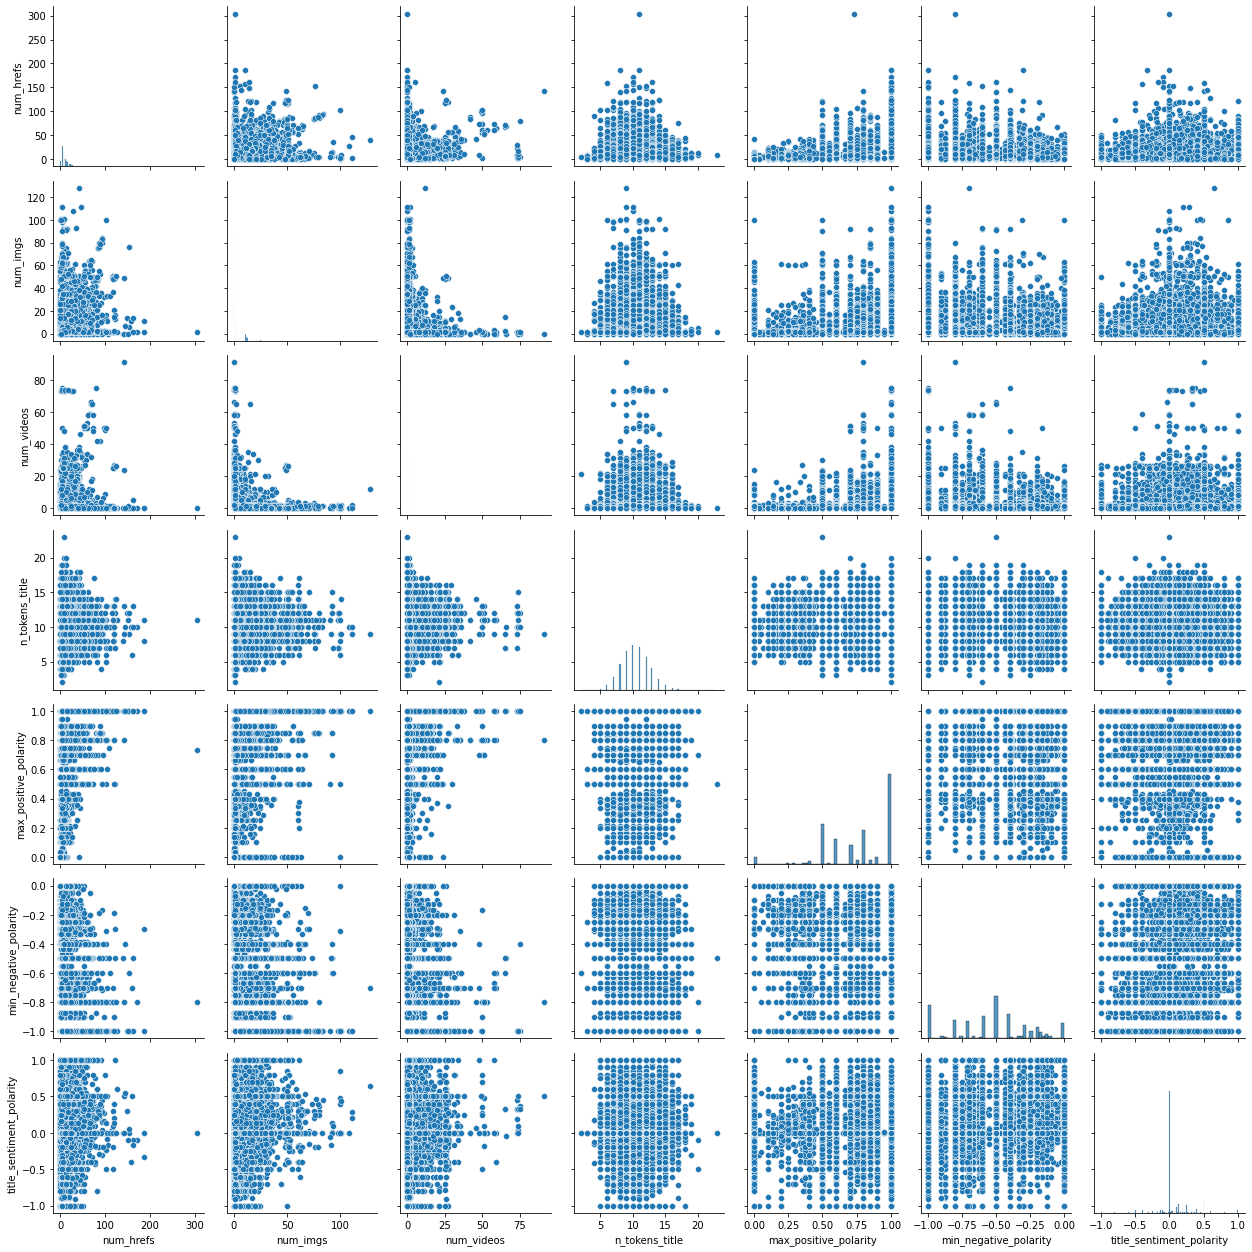

In [4]:
# зміна типу даних в колонках

df['n_tokens_title']=df['n_tokens_title'].replace(',','.').astype(float)
df['num_imgs']=df['num_imgs'].replace(',','.').astype(float)
df['num_videos']=df['num_videos'].replace(',','.').astype(float)
df['max_positive_polarity']=df['max_positive_polarity'].replace(',','.').astype(float)
df['min_negative_polarity']=df['min_negative_polarity'].replace(',','.').astype(float)
df['title_sentiment_polarity']=df['title_sentiment_polarity'].replace(',','.').astype(float)
# кореляція і виведення графіків
cols = ['num_hrefs','num_imgs','num_videos','n_tokens_title','max_positive_polarity','min_negative_polarity','title_sentiment_polarity']
sb.pairplot(df[cols]);
plt.tight_layout();
plt.show()


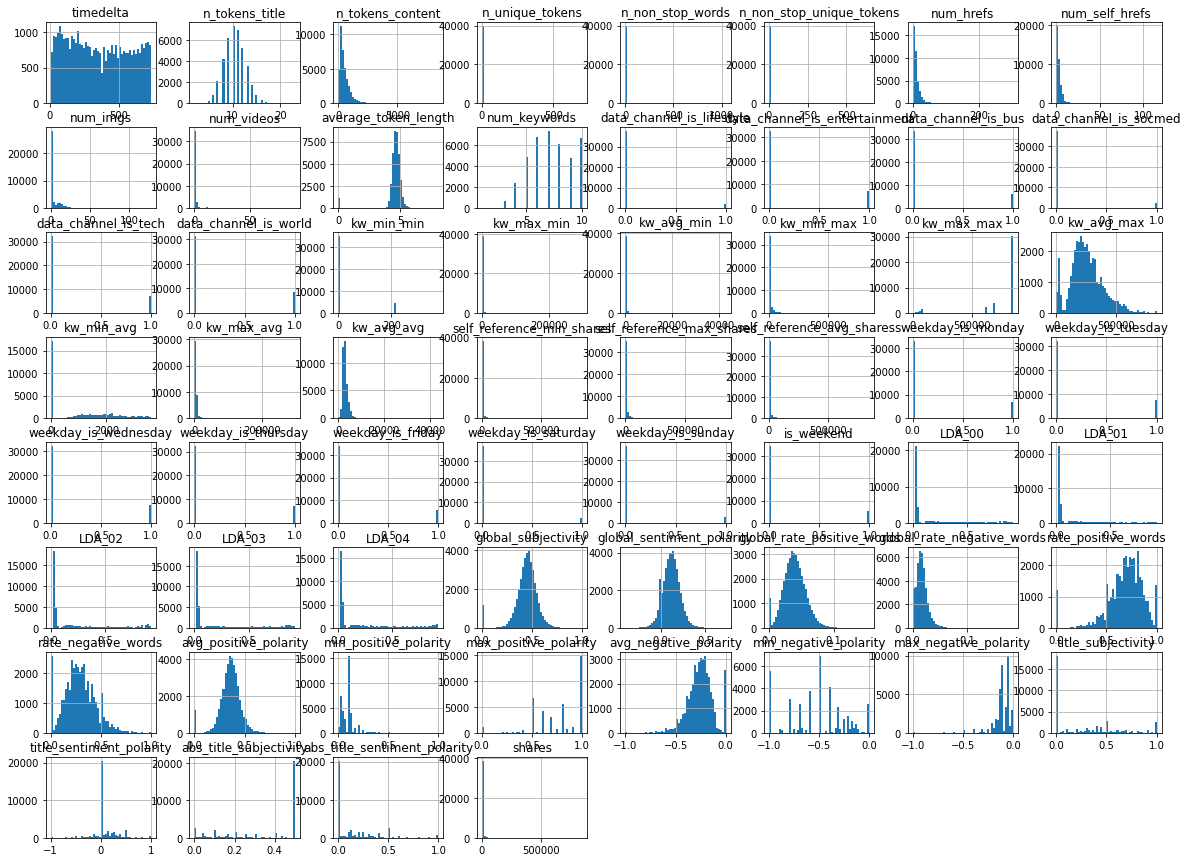

In [5]:
#вивід графіків в діаграмах
df.hist(bins=50,figsize=(20,15))
plt.show()

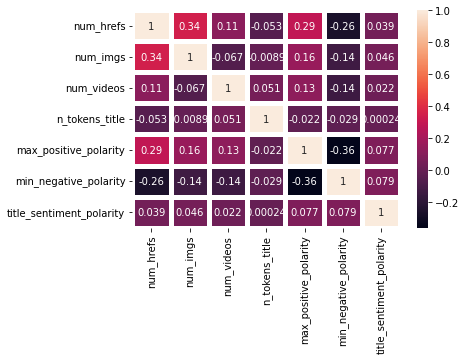

In [6]:
# Кореляція Пірсона для даних і побудова heatmap
cm = df[cols].corr()
hm = sb.heatmap(data =cm,cbar = True,annot = True,square = False,xticklabels =cols,yticklabels = cols,linewidths = 3.2)
plt.show()

In [7]:
#кореляція між характеристиками та цільовою змінною
corr_matrix = df.corr()
corr_matrix['n_tokens_title'].sort_values(ascending = False)

n_tokens_title                   1.000000
data_channel_is_entertainment    0.132791
kw_max_max                       0.120841
kw_avg_max                       0.115746
title_subjectivity               0.077245
LDA_01                           0.063568
num_videos                       0.051460
data_channel_is_world            0.049223
LDA_03                           0.042208
abs_title_sentiment_polarity     0.040550
LDA_02                           0.038365
rate_negative_words              0.034186
n_tokens_content                 0.018160
global_rate_negative_words       0.015530
kw_min_max                       0.012926
max_negative_polarity            0.011425
weekday_is_tuesday               0.009322
weekday_is_wednesday             0.008935
shares                           0.008783
kw_max_avg                       0.006918
weekday_is_sunday                0.006289
kw_avg_avg                       0.004296
weekday_is_monday                0.004274
self_reference_avg_sharess       0

<AxesSubplot:xlabel='num_imgs', ylabel='num_videos'>

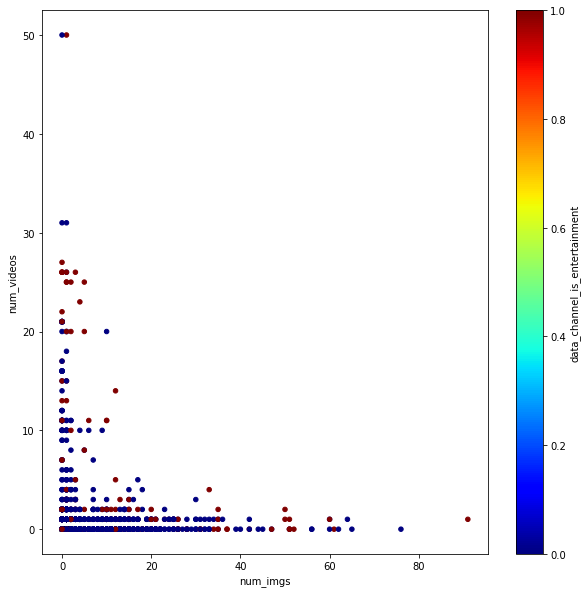

In [8]:
#точкова діаграма
np.random.seed(42)
sample=df.sample(n=2500)
sample.plot(kind="scatter",x="num_imgs",y="num_videos",
                 figsize=(10,10),c="data_channel_is_entertainment",
                 cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)

In [9]:

#фільтрація даних
df_filtered = df
df_filtered = df_filtered.drop(columns=['url','timedelta','data_channel_is_entertainment','n_tokens_content','n_non_stop_words','n_non_stop_unique_tokens','num_self_hrefs','max_positive_polarity','min_positive_polarity','max_negative_polarity','title_subjectivity','title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity'])
df_filtered = df_filtered[~df_filtered.isin([np.nan, np.inf, -np.inf]).any(1)]


In [10]:
#присвоюємо певні колонки змінним з датасету
X = df_filtered[['num_hrefs','num_imgs','num_videos','shares','min_negative_polarity']]
y = df_filtered['n_tokens_title']
print(X.shape,y.shape)

(39644, 5) (39644,)


In [11]:
# Розбиття даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
def normalize(X):
    mean = np.mean(X,axis =0)
    std = np.std(X,axis =0)
    X_new = (X-mean)/std
    return X_new, mean, std

In [13]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [14]:
def hypothesis(X, theta):
    h_thetha = X.dot(theta)
    return h_thetha

In [15]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J=np.sum((hypothesis(X, theta)-y)**2)/(2*m)
    return J

In [16]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_thetha=np.dot(hypothesis(X, theta) - y, X) / m  
    return d_thetha

In [17]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    eps=0.00001
    m = X.shape[0]
    J_history = []
    current_iteration=0;
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
    
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J_i = cost_function(X, y, theta)
        if print_J == True:
            print(J_i)
        J_history.append(J_i)
        current_iteration+=1;
        if (math.fabs(J_i - J) <  eps  or current_iteration >num_iters):
            break
        else:
            J=J_i
    return theta, J_history

In [18]:
def Predict(X,mean,std,theta):
    X =(X-mean)/std;
    X = prepare_X(X)
    predicted =hypothesis(X,theta);
    return predicted

In [19]:
#нормалізація даних
X_train_norm, mean, std = normalize(X_train)
X_train = prepare_X(X_train_norm)
theta = np.array([0,0,0,0,0,0])
alpha = 0.01
num_iters = 1500

In [20]:
print(f'X:{X_train.shape}')
print(f'y:{y_train.shape}')
print(cost_function(X_train, y_train, theta))

X:(23786, 6)
y:(23786,)
56.412847893719


In [21]:
#вивід кінцевого вектора theta із алгоритму градієнтного спуску
new_theta, Js = gradient_descent(X_train, y_train, theta, alpha, num_iters, False)
print(new_theta)

[10.37680639 -0.16277081  0.03273355  0.11517798  0.02591411 -0.07937203]


In [24]:
#знаходження штрафних функцій за тестовими даних та порівняння з точними
X_test_proc =(X_test.copy() - mean) / std
X_test_proc = prepare_X(X_test_proc)

y_test_pred = hypothesis(X_test_proc, new_theta)
print(cost_function(X_test_proc, y_test, theta))
res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred})
print(res)

56.134506242905786
       y_actual     y_pred
32340      12.0  10.485279
10480       9.0  10.303278
15370       9.0  10.518007
31592      12.0  10.299903
198        11.0  10.398006
...         ...        ...
14185      10.0  10.309947
16900      11.0  10.330271
18965       9.0  10.402410
5512        8.0  10.323894
37847      10.0  10.382182

[15858 rows x 2 columns]


In [408]:
#RMSE, MSE, MAE
predicted = Predict(X_test,mean,std,new_theta)
print(f"average_absolute_error:{mean_absolute_error(y_test.values,predicted)}")
print(f"average_squared_error:{mean_squared_error(y_test.values,predicted)}")
print(f"root_mean_squared_error:{mean_squared_error(y_test.values,predicted,squared=False)}")

average_absolute_error:1.6833917385577395
average_squared_error:4.381280220728252
root_mean_squared_error:2.093150787862225


In [409]:
# Розбиття даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [410]:
#Sklearn regressor
polinomial_degree = 2;
polynomial_features = PolynomialFeatures(degree=polinomial_degree,include_bias=False)
linear_regression = LinearRegression(normalize=True)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X_train, y_train)

C:\maschine learning\venv\linear_regression\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression(normalize=True))])

In [412]:
print(f"average_absolute_error:{mean_absolute_error(y_test.values,predicted)}")
print(f"average_squared_error:{mean_squared_error(y_test.values,predicted)}")
print(f"root_mean_squared_error:{mean_squared_error(y_test.values,predicted,squared=False)}")

average_absolute_error:1.680191189887319
average_squared_error:4.371724742257133
root_mean_squared_error:2.090866983396393


In [25]:
#оцінка результатів cross validation platform
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
lin_reg=LinearRegression().fit(X_train,y_train)
scores=cross_val_score(lin_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=10)    
lin_reg_scores=np.sqrt(-scores)
display_scores(lin_reg_scores)

Scores: [2.12324135 2.07757506 2.09607514 2.11054634 2.14946877 2.1635308
 2.13022961 2.08521209 2.10652984 2.09773552]
Mean: 2.1140144539617234
Standard deviation: 0.026209195819822718


In [41]:
#дістаємо найважливіші характеристики
feature_importances=lin_reg.coef_

In [50]:
# підсумовуєм найважливіші характеристики
str_arr=np.array(['num_hrefs','num_imgs','num_videos','shares','min_negative_polarity','n_tokens_title'])
for i,v in enumerate(feature_importances):
	print("Feature: {0}, Score: {1}".format(str_arr[i],v))

Feature: num_hrefs, Score: 0.0
Feature: num_imgs, Score: -0.1668180997380816
Feature: num_videos, Score: 0.0357646432165325
Feature: shares, Score: 0.11645180512795418
Feature: min_negative_polarity, Score: 0.026075404847899906
Feature: n_tokens_title, Score: -0.08080014575979393
